### GAN using PyTorch with the FashionMNIST dataset

In [78]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim


In [79]:
train_data =datasets.FashionMNIST(
    root='data',
    train=True,
    download=False,
    transform=transforms.ToTensor(),# transform data
    target_transform=None # how do we want to transform labels
)


In [80]:
# Hyperparameters
latent_dim = 100
image_size = 28 * 28  # FashionMNIST images are 28x28
batch_size = 32  # Use a smaller batch size for smaller datasets
epochs = 50
lr = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [81]:
# Transformation to normalize data to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])




In [82]:

# Load FashionMNIST dataset
full_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)

# Limit dataset size to 200 samples for faster training
subset_size = 800


In [83]:
indices = random.sample(range(len(full_dataset)), subset_size)
subset = torch.utils.data.Subset(full_dataset, indices)

# DataLoader
train_loader = DataLoader(subset, batch_size=batch_size, shuffle=True)

In [84]:

class Generator(nn.Module):
    def __init__(self, latent_dim, image_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()  # Output normalized to [-1, 1]
        )

    def forward(self, z):
        return self.model(z)


In [85]:
class Discriminator(nn.Module):
    def __init__(self, image_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.model(x)

In [86]:

generator = Generator(latent_dim, image_size).to(device)
discriminator = Discriminator(image_size).to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))


10955
10622
44581
23807
8946
41878
6952
26355
31945
34519
15409
53748
54984
24389
24991
41898


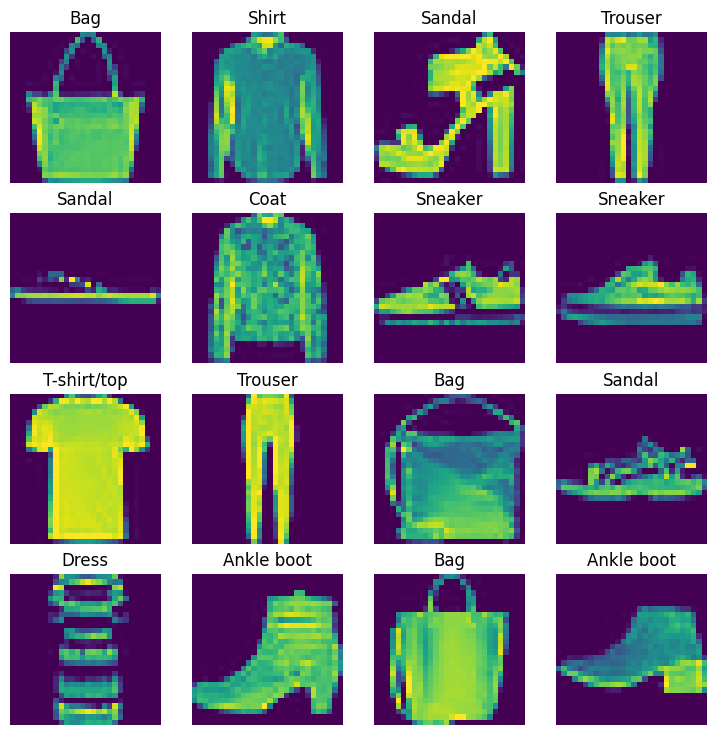

In [90]:
# original datA
fig = plt.figure(figsize=(9,9))
rows ,cols=4,4
for i in range(1, rows*cols+1):
    #print(i)
    randomindex=torch.randint(0,len(train_data),size=[1]).item()
    print(randomindex)

    img,label=train_data[randomindex]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze())
    plt.axis(False)
    plt.title(train_data.classes[label])

In [87]:

for epoch in range(epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        # Flatten real images and move to device
        real_images = real_images.view(-1, image_size).to(device)

        # Create labels dynamically based on batch size
        real_labels = torch.ones(real_images.size(0), 1).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images loss
        real_loss = criterion(discriminator(real_images), real_labels)

        # Generate fake images
        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_images = generator(z)

        # Fake images loss
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)

        # Total Discriminator loss
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generate fake images again
        g_loss = criterion(discriminator(fake_images), real_labels)  # Trick discriminator
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/50] | D Loss: 0.9841 | G Loss: 0.9556
Epoch [2/50] | D Loss: 0.9190 | G Loss: 0.9610
Epoch [3/50] | D Loss: 0.3840 | G Loss: 1.3215
Epoch [4/50] | D Loss: 0.1828 | G Loss: 2.0266
Epoch [5/50] | D Loss: 0.0492 | G Loss: 3.7717
Epoch [6/50] | D Loss: 1.1664 | G Loss: 1.1879
Epoch [7/50] | D Loss: 0.1105 | G Loss: 3.7805
Epoch [8/50] | D Loss: 0.3115 | G Loss: 2.6722
Epoch [9/50] | D Loss: 0.0874 | G Loss: 4.9346
Epoch [10/50] | D Loss: 0.6225 | G Loss: 6.2196
Epoch [11/50] | D Loss: 0.8300 | G Loss: 6.6967
Epoch [12/50] | D Loss: 0.1717 | G Loss: 4.3950
Epoch [13/50] | D Loss: 0.4039 | G Loss: 3.9395
Epoch [14/50] | D Loss: 0.4492 | G Loss: 6.9577
Epoch [15/50] | D Loss: 0.5493 | G Loss: 3.6092
Epoch [16/50] | D Loss: 0.5609 | G Loss: 5.9295
Epoch [17/50] | D Loss: 0.3384 | G Loss: 4.0452
Epoch [18/50] | D Loss: 0.4233 | G Loss: 5.4038
Epoch [19/50] | D Loss: 0.5466 | G Loss: 5.2143
Epoch [20/50] | D Loss: 0.3758 | G Loss: 3.6867
Epoch [21/50] | D Loss: 0.2841 | G Loss: 6.0494
E

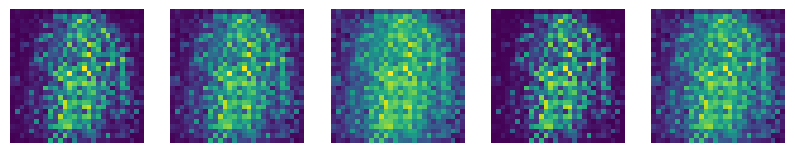

In [88]:
def generate_and_plot(generator, latent_dim, n_images=5):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    fake_images = generator(z).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(fake_images[i].squeeze())
        plt.axis("off")
    plt.show()

# Generate and visualize images
generate_and_plot(generator, latent_dim)

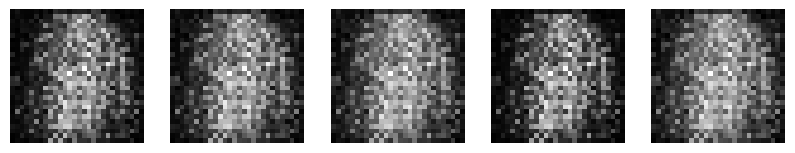

In [89]:
def generate_and_plot(generator, latent_dim, n_images=5):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    fake_images = generator(z).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(fake_images[i].squeeze(),cmap='gray')
        plt.axis("off")
    plt.show()

# Generate and visualize images
generate_and_plot(generator, latent_dim)

# |cGAN

To generate images for specific classes in the FashionMNIST dataset using a GAN, you can modify the generator to condition it on the class labels. This technique is called a Conditional GAN (cGAN). Here's how you can adapt the code:

In [54]:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


In [55]:
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, num_classes, image_size):
        super(ConditionalGenerator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, z, labels):
        # Concatenate latent vector and label embedding
        c = self.label_embedding(labels)
        x = torch.cat([z, c], dim=1)
        return self.model(x)



In [56]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, num_classes, image_size):
        super(ConditionalDiscriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(image_size + num_classes, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        # Concatenate image and label embedding
        c = self.label_embedding(labels)
        x = torch.cat([x, c], dim=1)
        return self.model(x)


In [ ]:

num_classes = 10  # FashionMNIST has 10 classes
generator = ConditionalGenerator(latent_dim, num_classes, image_size).to(device)
discriminator = ConditionalDiscriminator(num_classes, image_size).to(device)

for epoch in range(epochs):
    for batch_idx, (real_images, labels) in enumerate(train_loader):
        real_images = real_images.view(-1, image_size).to(device)
        labels = labels.to(device)

        # Real labels for real images
        real_targets = torch.ones(real_images.size(0), 1).to(device)
        fake_targets = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_images, labels), real_targets)

        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_labels = torch.randint(0, num_classes, (real_images.size(0),)).to(device)
        fake_images = generator(z, fake_labels)
        fake_loss = criterion(discriminator(fake_images.detach(), fake_labels), fake_targets)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(fake_images, fake_labels), real_targets)  # Trick discriminator
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/50] | D Loss: 1.3814 | G Loss: 0.7001
Epoch [2/50] | D Loss: 1.3728 | G Loss: 0.6989
Epoch [3/50] | D Loss: 1.3759 | G Loss: 0.6985
Epoch [4/50] | D Loss: 1.3728 | G Loss: 0.6984
Epoch [5/50] | D Loss: 1.3768 | G Loss: 0.6985
Epoch [6/50] | D Loss: 1.3774 | G Loss: 0.6992
Epoch [7/50] | D Loss: 1.3739 | G Loss: 0.6985
Epoch [8/50] | D Loss: 1.3719 | G Loss: 0.6992
Epoch [9/50] | D Loss: 1.3705 | G Loss: 0.7006
Epoch [10/50] | D Loss: 1.3672 | G Loss: 0.6992
Epoch [11/50] | D Loss: 1.3792 | G Loss: 0.6993
Epoch [12/50] | D Loss: 1.3685 | G Loss: 0.6978
Epoch [13/50] | D Loss: 1.3793 | G Loss: 0.6988
Epoch [14/50] | D Loss: 1.3757 | G Loss: 0.6996
Epoch [15/50] | D Loss: 1.3750 | G Loss: 0.7004
Epoch [16/50] | D Loss: 1.3768 | G Loss: 0.7006
Epoch [17/50] | D Loss: 1.3845 | G Loss: 0.6971
Epoch [18/50] | D Loss: 1.3792 | G Loss: 0.6985
Epoch [19/50] | D Loss: 1.3733 | G Loss: 0.6989
Epoch [20/50] | D Loss: 1.3775 | G Loss: 0.6973
Epoch [21/50] | D Loss: 1.3785 | G Loss: 0.6997
E

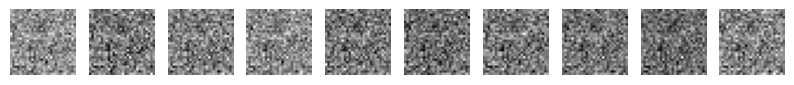

In [ ]:
def generate_images_for_class(generator, latent_dim, class_label, n_images=10):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    labels = torch.tensor([class_label] * n_images).to(device)  # Same class label for all images
    fake_images = generator(z, labels).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(fake_images[i].squeeze(), cmap="gray")
        plt.axis("off")
    plt.show()

# Example: Generate images for the "Sneaker" class
class_name = input('enter class to generate')
class_label = list(class_names.keys())[list(class_names.values()).index(class_name)]
generate_images_for_class(generator, latent_dim, class_label)
